In [1]:
"""
This notebook generates plots in Supplementary Fig. 1A of the paper.
"""

'\nThis notebook generates plots in Supplementary Fig. 1A of the paper.\n'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [4]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "evaluation_data.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -cvzf {SCRATCH}/{TAR}")

wget https://zenodo.org/records/10597358/files/evaluation_data.tar.gz -P /Users/adamhe/github/scratch
tar -cvzf /Users/adamhe/github/scratch/evaluation_data.tar.gz


In [15]:
# LOAD DATA

datafolds = pd.read_csv(os.path.join(SCRATCH, "evaluation_data/data_fold_assignments.csv.gz"))
chroms = [
    ",".join(fold[1]).replace("chr", "") for fold in list(datafolds.groupby("fold").chrom)
]

summstats = pd.read_csv(
    os.path.join(SCRATCH, "evaluation_data/predictions/ensemble_test/summ_stats_ensemble_holdouts.csv.gz"), index_col=0
).map("{:,.3f}".format)

summstats["test_fold"] = summstats.index
summstats["test_chrom"] = chroms[1:]
summstats["val_fold"] = list(summstats.index[1:]) + [summstats.index[0]]
summstats["val_chrom"] = list(summstats.test_chrom[1:]) + [summstats.test_chrom.iloc[0]]

summstats

,median_track_pcc,tss_pcc,log_quantity_pcc,test_fold,test_chrom,val_fold,val_chrom
1,0.674,0.759,0.598,1,"5,7",2,"12,11"
2,0.677,0.757,0.608,2,"12,11",3,"14,15,18"
3,0.664,0.743,0.580,3,"14,15,18",4,1
4,0.680,0.768,0.604,4,1,5,"2,22"
5,0.659,0.722,0.589,5,"2,22",6,"4,6"
6,0.657,0.732,0.532,6,"4,6",7,"3,16"
7,0.644,0.743,0.564,7,"3,16",8,"19,10"
8,0.650,0.712,0.591,8,"19,10",9,"17,8"
9,0.670,0.726,0.547,9,"17,8",1,"5,7"


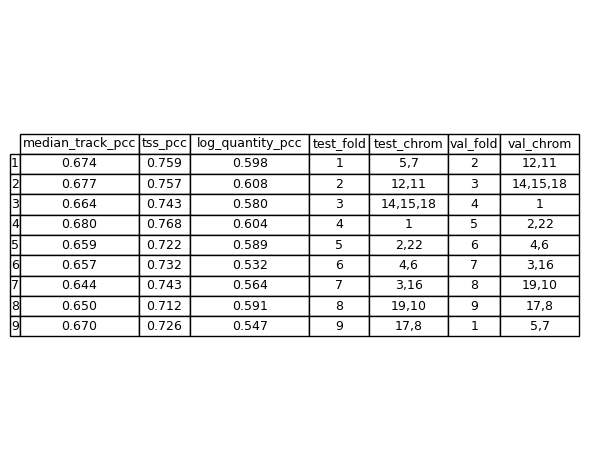

In [16]:
fix, ax = plt.subplots()
ax.axis("off")
table = pd.plotting.table(
    ax, summstats,
    loc="center", cellLoc="center", colWidths=[0.3, 0.13, 0.3, 0.15, 0.2, 0.13, 0.2],
)
table.auto_set_font_size(False)
table.set_fontsize(9)
plt.tight_layout() 
plt.savefig("img/summ_stats_ensemble_holdouts.pdf")